In [14]:

'''

Economic Forecasts with the Yield Curve

Every U.S. recession in the past 60 years was preceded by a negative term spread (an inverted yield curve).
(Rudebusch and Williams 2009). This project hopes to visually display the striking accuracy of the
2-year and 10-year term spread (the main one that traders watch), as well as the 3-month/10-year and
5-year/30-year spreads. 

'''



'\n\nEconomic Forecasts with the Yield Curve\n\nEvery U.S. recession in the past 60 years was preceded by a negative term spread (an inverted yield curve).\n(Rudebusch and Williams 2009). This project hopes to visually display the striking accuracy of the\n2-year and 10-year term spread (the main one that traders watch), as well as the 3-month/10-year and\n5-year/30-year spreads. \n\n'

In [15]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import timedelta
import matplotlib.dates as mdates

In [16]:
# Load Treasury rates 
# https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=all

#Load Spy Historical data
#https://www.wsj.com/market-data/quotes/index/SPX/historical-prices

In [17]:
rates = pd.read_csv('daily-treasury-rates.csv')
rates.head(-5)

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,03/31/2022,0.17,0.35,0.52,1.06,1.63,2.28,2.45,2.42,2.40,2.32,2.59,2.44
1,03/30/2022,0.16,0.33,0.55,1.04,1.64,2.31,2.49,2.44,2.43,2.35,2.63,2.48
2,03/29/2022,0.18,0.34,0.55,1.06,1.67,2.35,2.54,2.49,2.50,2.41,2.68,2.53
3,03/28/2022,0.19,0.36,0.59,1.08,1.69,2.35,2.55,2.54,2.55,2.46,2.72,2.57
4,03/25/2022,0.17,0.32,0.55,1.01,1.67,2.30,2.51,2.55,2.56,2.48,2.74,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8060,01/16/1990,NaN,NaN,7.89,7.99,7.92,8.10,8.13,8.11,8.18,8.20,NaN,8.25
8061,01/12/1990,NaN,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,NaN,8.17
8062,01/11/1990,NaN,NaN,7.80,7.80,7.77,7.91,7.95,7.94,8.01,8.04,NaN,8.11
8063,01/10/1990,NaN,NaN,7.75,7.78,7.77,7.91,7.95,7.92,8.00,8.03,NaN,8.11


In [18]:
spy = pd.read_csv('HistoricalPrices.csv')
spy.head(-5)

,Date,Open,High,Low,Close
0,04/01/22,4540.32,4548.70,4507.57,4545.86
1,03/31/22,4599.02,4603.07,4530.41,4530.41
2,03/30/22,4624.20,4627.77,4581.32,4602.45
3,03/29/22,4602.86,4637.30,4589.66,4631.60
4,03/28/22,4541.09,4575.65,4517.69,4575.52
...,...,...,...,...,...
8116,01/16/90,340.75,340.75,333.37,340.75
8117,01/15/90,337.00,339.94,336.57,337.00
8118,01/12/90,339.93,348.53,339.49,339.93
8119,01/11/90,348.53,350.14,347.31,348.53


In [19]:
# Converting to datetime

In [20]:
rates['Date'] = pd.to_datetime(rates['Date'])
spy['Date'] = pd.to_datetime(spy['Date'])

In [21]:
# Calculating the yield spread 
# three_month = 10 Yr - 3 Mo
# two_year = 10 Yr - 2 Yr

In [22]:
rates = rates.assign(three_month = rates['10 Yr'] - rates['3 Mo'], 
                     two_year = rates['10 Yr'] - rates['2 Yr'])

In [23]:
rates.head(5)

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,three_month,two_year
0,2022-03-31,0.17,0.35,0.52,1.06,1.63,2.28,2.45,2.42,2.40,2.32,2.59,2.44,1.80,0.04
1,2022-03-30,0.16,0.33,0.55,1.04,1.64,2.31,2.49,2.44,2.43,2.35,2.63,2.48,1.80,0.04
2,2022-03-29,0.18,0.34,0.55,1.06,1.67,2.35,2.54,2.49,2.50,2.41,2.68,2.53,1.86,0.06
3,2022-03-28,0.19,0.36,0.59,1.08,1.69,2.35,2.55,2.54,2.55,2.46,2.72,2.57,1.87,0.11
4,2022-03-25,0.17,0.32,0.55,1.01,1.67,2.30,2.51,2.55,2.56,2.48,2.74,2.60,1.93,0.18


In [24]:
# Comparing Yield Curve for popular rate terms

In [25]:
rates1 = rates[['Date' ,'1 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '5 Yr', '10 Yr', '30 Yr']]
rates1.set_index('Date')

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,5 Yr,10 Yr,30 Yr
Date,,,,,,,,
2022-03-31,0.17,0.52,1.06,1.63,2.28,2.42,2.32,2.44
2022-03-30,0.16,0.55,1.04,1.64,2.31,2.44,2.35,2.48
2022-03-29,0.18,0.55,1.06,1.67,2.35,2.49,2.41,2.53
2022-03-28,0.19,0.59,1.08,1.69,2.35,2.54,2.46,2.57
2022-03-25,0.17,0.55,1.01,1.67,2.30,2.55,2.48,2.60
...,...,...,...,...,...,...,...,...
1990-01-08,NaN,7.79,7.88,7.81,7.90,7.92,8.02,8.09
1990-01-05,NaN,7.79,7.85,7.79,7.90,7.92,7.99,8.06
1990-01-04,NaN,7.84,7.90,7.82,7.92,7.91,7.98,8.04


In [26]:
# current = rates1.iloc[1,:] # Most recent data is first
# last_quarter = rates1.iloc[63,:] # 63 Trading Days in a quarter
# last_year = rates1.iloc[252,:] # 252 Trading Days in a year

In [27]:
# current.head()

In [28]:
current = rates1.loc[(rates['Date'] =='2022-03-31')].T
last_quarter = rates1.loc[(rates1['Date'] == '2021-12-31')].T
last_year = rates1.loc[(rates1['Date'] == '2021-03-31')].T

current.head()


,0
Date,2022-03-31 00:00:00
1 Mo,0.17
3 Mo,0.52
6 Mo,1.06
1 Yr,1.63


In [29]:
df = pd.concat([current, last_quarter, last_year], axis = 1)
df.columns = ['current', 'last_quarter', 'last_year']
df.head()

,current,last_quarter,last_year
Date,2022-03-31 00:00:00,2021-12-31 00:00:00,2021-03-31 00:00:00
1 Mo,0.17,0.06,0.01
3 Mo,0.52,0.06,0.03
6 Mo,1.06,0.19,0.05
1 Yr,1.63,0.39,0.07


In [30]:
df = df.iloc[1:, :]

In [31]:
df.columns = ['03-31-2022', '12-31-2021', '03-31-2021']

Text(0, 0.5, 'Yield in Percent')

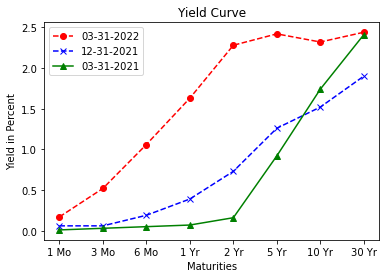

In [32]:

ax = df.plot(style={'03-31-2022': 'ro--', '12-31-2021': 'bx--', '03-31-2021': 'g^-'}, title='Yield Curve')
ax.set_xlabel('Maturities')
ax.set_ylabel('Yield in Percent')

# plt.savefig('Yield Curve.png')

In [33]:
# Joining data for rates and SP500 close price together

In [34]:
together = pd.merge(rates, spy, how ='left', on = 'Date') 

In [35]:
# Checking for missing values
together.isnull().sum()

Date              0
1 Mo           2900
2 Mo           7205
3 Mo              4
6 Mo              1
1 Yr              1
2 Yr              1
3 Yr              1
5 Yr              1
7 Yr              1
10 Yr             1
20 Yr           940
30 Yr           995
three_month       4
two_year          1
 Open            12
 High            12
 Low             12
 Close           12
dtype: int64

In [36]:
# Since this project isn't focused on 1 Mo and 2 Mo rate spreads, I will be ignoring those null values
# Therefore, I decided to first create a new variable that contains the values I am interested in

In [37]:
spread = together[['Date', 'three_month', 'two_year', ' Close']]

In [38]:
# Now, I replace the missing values
# Since this data is gathered daily, and the bigger picture timeframe is larger
# I decided it is probably okay to remove the NA values (since there's not too many)

In [39]:
spread = spread.dropna(axis = 0, how = 'any')

In [40]:
# Double checking if null values were removed
spread.isnull().sum()

Date           0
three_month    0
two_year       0
 Close         0
dtype: int64

In [41]:
# Comparing Term Spreads

Text(0.5, 1.0, 'Yield Terms over Time')

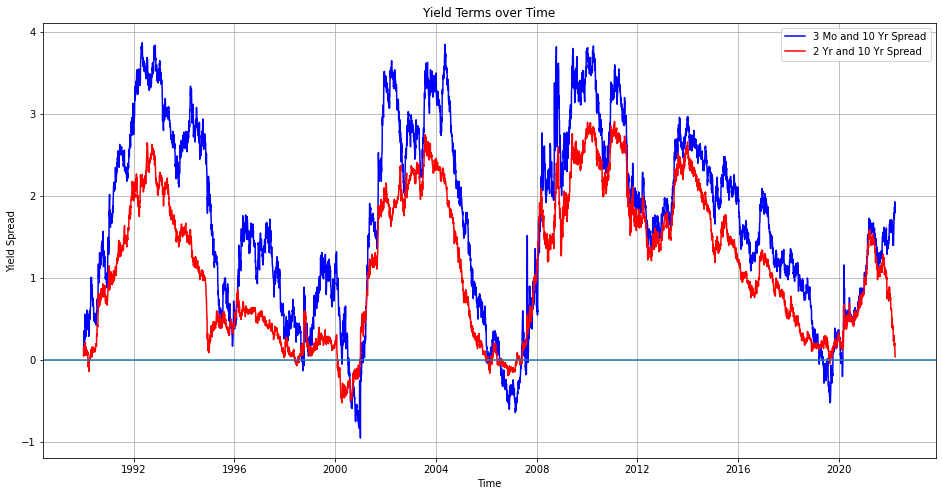

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(spread['Date'],
        spread['three_month'], 
         color = 'b', 
         label = '3 Mo and 10 Yr Spread')
plt.plot(spread['Date'], 
         spread['two_year'], 
         color = 'r', 
         label = '2 Yr and 10 Yr Spread')

ax.grid(True)
plt.axhline(0)
plt.legend()


# labels
ax.set_xlabel('Time')
ax.set_ylabel('Yield Spread')
plt.title('Yield Terms over Time')

# plt.savefig('3mo_2Yr_Yield_Spreads.png')

In [43]:
# They follow the same shape...so we shall focus on 3 Mo and 10 Yr Spread

In [44]:
# Finding the intervals when the spread is inverted

In [45]:
def find_invert_intervals (spread, tag):
    in_intervals = []
    in_invert = False
    in_max = 0.0
    in_start = -1
    in_end = -1
    for ind in spread.index:
        #print(ind, spread['Date'][ind], spread['three_month'][ind])
        if spread[tag][ind] < 0.0:
            #print(ind, spread['Date'][ind], spread['three_month'][ind])
            if not in_invert:
                in_start = ind
                in_invert = True
          
            if abs(spread[tag][ind]) > in_max:
                in_max = abs(spread[tag][ind])
        elif spread[tag][ind] > 0.0:
            #print(ind, spread['Date'][ind], spread['three_month'][ind])
            if in_invert:
                in_end = ind - 1
                in_invert = False
                #print((in_start, in_end))
                in_intervals.append((spread['Date'][in_start], 
                                    spread['Date'][in_end],
                                    (spread['Date'][in_end] 
                                    -spread['Date'][in_start]).days + 1,
                                    round(in_max,4)
                                    ))
                in_max = 0.0

  
    return in_intervals

In [46]:
spread=spread.sort_values('Date')
m3_intervals = find_invert_intervals(spread, 'three_month')

In [47]:
# Load in Recession Data
# https://fred.stlouisfed.org/series/JHDUSRGDPBR

In [48]:
resdata = pd.read_csv('JHDUSRGDPBR.csv')

resdata = resdata.rename(columns={'DATE':'Date','JHDUSRGDPBR':'Recession'})
resdata['Date'] = pd.to_datetime(resdata['Date'])

In [49]:
cut_off_date = '1990-01-01'
resdata = resdata[resdata['Date'] > cut_off_date]

In [50]:
# Finding Recession Interval

In [51]:
rec_interval = []
in_rec = False
rec_start = -1
rec_end = -1

for ind in resdata.index:
    if resdata['Recession'][ind] > 0.0:
        if not in_rec:
            rec_start = ind
            in_rec = True
    else:
        if in_rec:
            rec_end = ind 
            in_rec = False
            rec_interval.append((resdata['Date'][rec_start],
                                 resdata['Date'][rec_end]))

In [52]:
#print(rec_interval)

In [53]:
# Plotting 3 Month Spread and highlighting when Recession was

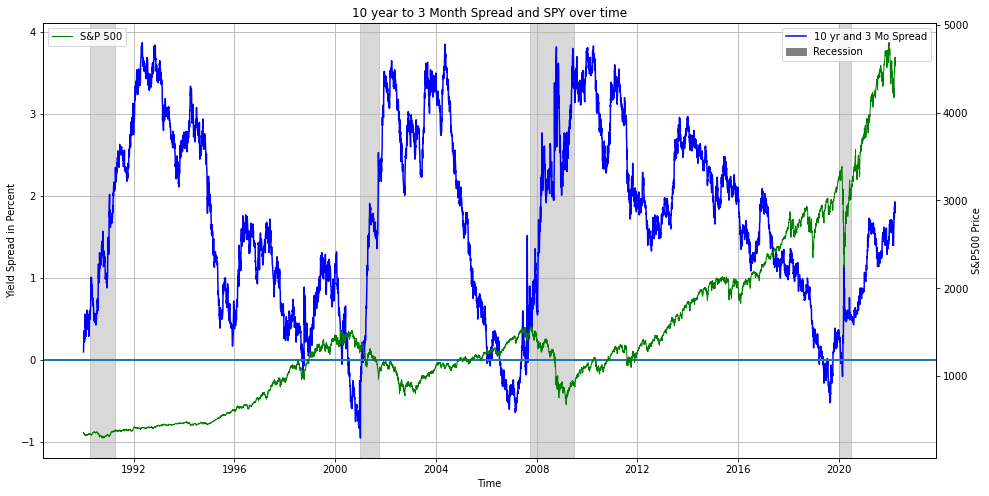

In [54]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(spread['Date'],
        spread['three_month'], 
         color = 'b', 
         label = '10 yr and 3 Mo Spread')

for s, e in rec_interval:
    plt.axvspan(s, 
                e, 
                color="grey", 
                alpha=0.3)

    plt.axhline(0)
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color = 'grey', label = 'Recession')
handles.append(patch)

plt.legend(handles = handles)


# Getting Second Axis
ax2 = ax.twinx()
plt.plot(spread['Date'],
        spread[' Close'],
        color = 'g', 
        linewidth=1,
         label = 'S&P 500')
ax2.set_ylabel('S&P500 Price')
ax2.legend()

# labels
ax.set_xlabel('Time')
ax.set_ylabel('Yield Spread in Percent')
plt.title('10 year to 3 Month Spread and SPY over time')
ax.grid(True)

plt.savefig('spread_and_spy.png')



In [55]:
# Did not have data pre 01-01-1990, so there could have been inversion prior to Recession in 1990.

In [56]:
# Function for computing percent return of SPY 

In [57]:
def compute_return_pct (price_start, price_end):
    return ((price_end - price_start) / price_start ) * 100.0

In [58]:
# Function for finding Prices of Spy on certain dates

In [59]:
def compute_sp_fowrard_return(start_date, num_months, spdf):
    from datetime import timedelta
    price_s = spdf[' Close'].loc[(spdf['Date'] == start_date)].values[0]
    end_date = start_date + timedelta(days=num_months*30)
    #print(end_date)
    maxDate=spdf['Date'][spdf['Date'].idxmax()]
    while spdf[' Close'].loc[(spdf['Date'] == end_date)].size < 1:
        end_date = end_date + timedelta(days=1)
        if end_date > maxDate:
            end_date = maxDate
    price_e = spdf[' Close'].loc[(spdf['Date'] == end_date)].values[0]
    return compute_return_pct(price_s, price_e)

In [60]:
# Finding Inversion Dates and pairing with SPY returns

In [61]:
def compute_invert_metrics(in_intervals, resdata, spdf):
    metrics_ls=[]
    for s,e,d,m in in_intervals:
        metrics={}
        metrics['Start Date']= s
        metrics['End Date'] = e 
        metrics['Invert Duration'] = (e -s).days + 1 
        s_date = s
        #print(s_date)
        rs_index =(resdata.index[(resdata['Date'] >= s_date) 
              & (resdata['Recession'].gt(0.0))].tolist())[0]
        r_start = resdata['Date'][rs_index]
   
        metrics['Rec. Start'] = r_start
        metrics['Latency'] = (r_start - s_date).days + 1
        re_index =(resdata.index[(resdata['Date'] >= r_start) 
              & (resdata['Recession'].le(0.0))].tolist())[0]
        r_end = resdata['Date'][re_index -1]
        #e_recs=resdata.loc[(resdata['Date'] >= s_rstart) & (resdata['Recession'].le(0.0))]
 
        metrics['Rec. End'] = r_end
        metrics['Rec. Duration'] = ((r_end - r_start).days)/30 + 1
        metrics['sp_return_6m'] = compute_sp_fowrard_return(s_date, 6, spdf )
        metrics['sp_return_1yr'] = compute_sp_fowrard_return(s_date, 12, spdf )
        metrics['sp_return_2yr'] = compute_sp_fowrard_return(s_date, 24, spdf )
        #print(metrics)
        metrics_ls.append(metrics)
    
    invert_df = pd.DataFrame.from_records( metrics_ls)

    invert_df['Start Date'] = pd.to_datetime(invert_df['Start Date'])
    invert_df['End Date'] = pd.to_datetime(invert_df['End Date'])
    
    return invert_df

In [62]:
spread['Date'] = pd.to_datetime(spread['Date'])
spdf=spread[['Date', ' Close']]
spdf.head(5)
#spdf[' Close'].loc[(spdf['Date'] =='1999-09-07')].values[0]
spdf['Date'][spdf['Date'].idxmax()]

Timestamp('2022-03-31 00:00:00')

In [63]:
m3_invert_df = compute_invert_metrics(m3_intervals, resdata, spread[['Date', ' Close']])
m3_invert_df.head(20)

,Start Date,End Date,Invert Duration,Rec. Start,Latency,Rec. End,Rec. Duration,sp_return_6m,sp_return_1yr,sp_return_2yr
0,1998-09-10,1998-09-15,6,2001-01-01,845,2001-07-01,7.033333,30.570604,37.774309,53.295790
1,1998-09-21,1998-09-24,4,2001-01-01,834,2001-07-01,7.033333,26.674740,28.771645,45.451172
2,1998-10-05,1998-10-07,3,2001-01-01,820,2001-07-01,7.033333,33.640851,29.755402,45.568301
3,2000-04-07,2000-04-12,6,2001-01-01,270,2001-07-01,7.033333,-5.409701,-24.432354,-24.332113
4,2000-07-07,2000-07-18,12,2001-01-01,179,2001-07-01,7.033333,-8.880925,-16.376361,-33.015079
5,2000-07-19,2001-01-23,189,2001-01-01,167,2001-07-01,7.033333,-10.480040,-18.860833,-35.704742
6,2001-02-09,2001-02-13,5,2001-04-01,52,2001-07-01,4.033333,-9.981289,-16.757431,-35.759378
7,2006-01-17,2006-01-20,4,2007-10-01,623,2009-04-01,19.266667,-3.775732,11.520504,10.386381
8,2006-01-23,2006-01-26,4,2007-10-01,617,2009-04-01,19.266667,-0.230254,12.861800,12.061053
9,2006-02-22,2006-03-03,10,2007-10-01,587,2009-04-01,19.266667,0.375192,12.919771,4.346817


In [64]:
# If multiple inversions happen in a 6 month period, we group them together and count it as one inversion.

In [65]:
def combine_invert_for_barchar(in_intervals, spdf):
    cur_start_date = None
    metrics_ls = []
    cur_metrics = {}
    for s,e,d,m in in_intervals:
        if not cur_start_date:
            cur_start_date = s       
        elif s > cur_start_date + timedelta(days= 180):
            cur_metrics['Start Date']= cur_start_date
            cur_metrics['sp_return_6m'] = compute_sp_fowrard_return(cur_start_date, 6, spdf )
            cur_metrics['sp_return_1yr'] = compute_sp_fowrard_return(cur_start_date, 12, spdf )
            cur_metrics['sp_return_2yr'] = compute_sp_fowrard_return(cur_start_date, 24, spdf )
            metrics_ls.append(cur_metrics)
            cur_start_date = s
            cur_metrics={}
        else:
            continue
    
    invert_df = pd.DataFrame.from_records( metrics_ls)

    invert_df['Start Date'] = pd.to_datetime(invert_df['Start Date'])
   
    return invert_df

In [66]:
m3_combined_df = combine_invert_for_barchar(m3_intervals, spread[['Date', ' Close']])
m3_combined_df = m3_combined_df.set_index('Start Date')

In [67]:
m3_combined_df.head()

,sp_return_6m,sp_return_1yr,sp_return_2yr
Start Date,,,
1998-09-10,30.570604,37.774309,53.295790
2000-04-07,-5.409701,-24.432354,-24.332113
2001-02-09,-9.981289,-16.757431,-35.759378
2006-01-17,-3.775732,11.520504,10.386381
2006-07-17,15.991219,25.371611,1.443511


In [68]:
# Plotting barchart to showcase positive or negative SPY returns

In [69]:
# 6 Month SPY returns

Text(0, 0.5, 'SPY returns in Percent')

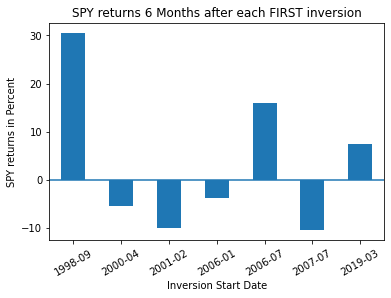

In [70]:
ax = m3_combined_df['sp_return_6m'].plot(kind='bar')

ax.set_xticklabels([x.strftime("%Y-%m") for x in m3_combined_df.index], rotation=45)
plt.axhline(0)
plt.xticks(rotation = 30, horizontalalignment = 'center')


plt.title("SPY returns 6 Months after each FIRST inversion")
plt.xlabel("Inversion Start Date")
plt.ylabel("SPY returns in Percent")

# plt.savefig('6_month_return.png')

In [71]:
# 1 Year

Text(0, 0.5, 'SPY returns in Percent')

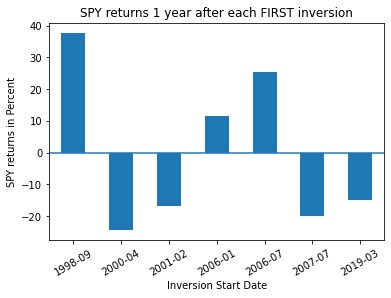

In [72]:
ax = m3_combined_df['sp_return_1yr'].plot(kind='bar')



ax.set_xticklabels([x.strftime("%Y-%m") for x in m3_combined_df.index], rotation=45)
plt.axhline(0)
plt.xticks(rotation = 30, horizontalalignment = 'center')


plt.title("SPY returns 1 year after each FIRST inversion")
plt.xlabel("Inversion Start Date")
plt.ylabel("SPY returns in Percent")

# plt.savefig('1yr_return.png')

In [73]:
# 2 Years

Text(0, 0.5, 'SPY returns in Percent')

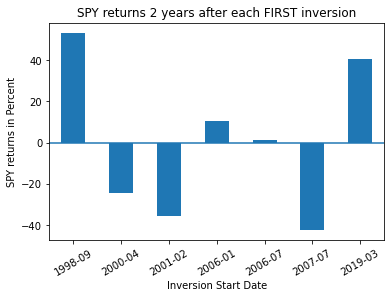

In [74]:
ax = m3_combined_df['sp_return_2yr'].plot(kind='bar')



ax.set_xticklabels([x.strftime("%Y-%m") for x in m3_combined_df.index], rotation=45)
plt.axhline(0)
plt.xticks(rotation = 30, horizontalalignment = 'center')


plt.title("SPY returns 2 years after each FIRST inversion")
plt.xlabel("Inversion Start Date")
plt.ylabel("SPY returns in Percent")

# plt.savefig('2yr_return.png')

In [75]:
# Together

Text(0, 0.5, 'SPY returns in Percent')

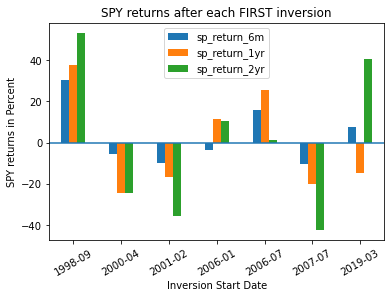

In [76]:
ax = m3_combined_df.plot(kind='bar')

ax.set_xticklabels([x.strftime("%Y-%m") for x in m3_combined_df.index], rotation=45)
plt.axhline(0)
plt.xticks(rotation = 30, horizontalalignment = 'center')


plt.title("SPY returns after each FIRST inversion")
plt.xlabel("Inversion Start Date")
plt.ylabel("SPY returns in Percent")

# plt.savefig('together_return.png')

In [77]:
# Conclusion: Not accurate indicator

In [78]:
# pip install dataframe_image

In [79]:
# import dataframe_image as dfi
# dfi.export(m3_invert_df, "dataframe.png")

[0429/103343.359083:INFO:headless_shell.cc(659)] Written to file /var/folders/sj/x46s482s0zs_2rd0g1_25m5r0000gn/T/tmp2u5wfuq9/temp.png.
